In [46]:
!pip install yfinance
!pip install yahoofinancials
!pip install matplotlib


In [47]:
import yfinance as yf
import yahoofinancials
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

In [48]:
stocks = ['CIPLA.NS','TATAMOTORS.NS','HDFCBANK.NS','MUTHOOTFIN.NS', 'ASIANPAINT.NS']

In [49]:
data = []
for t in stocks:
  data.append(yf.download(t, 
                      start='2015-04-01', 
                      end='2017-03-31'
                      ))
data = pd.concat([data[0]['Adj Close'], data[1]['Adj Close'], data[2]['Adj Close'], data[3]['Adj Close'], data[4]['Adj Close']], axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,689.644409,558.678955,495.678467,176.339081,783.949890
2015-04-06,714.961792,567.920044,495.054779,173.923492,786.621338
2015-04-07,707.721436,560.123108,495.438599,176.123398,796.829895
2015-04-08,715.982239,561.272705,496.781860,174.527390,807.944641
2015-04-09,699.217407,559.673340,506.640228,171.896088,813.955200
...,...,...,...,...,...
2017-03-24,580.866638,470.399994,694.086243,316.264587,1031.904785
2017-03-27,579.057373,464.750000,687.020447,316.174286,1011.203857
2017-03-28,581.062256,472.399994,692.063965,316.941895,1025.699341


In [50]:

return_1=data.pct_change()
return_1

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN
2015-04-06,0.036711,0.016541,-0.001258,-0.013699,0.003408
2015-04-07,-0.010127,-0.013729,0.000775,0.012649,0.012978
2015-04-08,0.011672,0.002052,0.002711,-0.009062,0.013949
2015-04-09,-0.023415,-0.002850,0.019844,-0.015077,0.007439
...,...,...,...,...,...
2017-03-24,-0.003858,-0.005287,-0.004577,-0.009475,0.002496
2017-03-27,-0.003115,-0.012011,-0.010180,-0.000286,-0.020061
2017-03-28,0.003462,0.016460,0.007341,0.002428,0.014335


In [51]:
mean_returns = return_1.mean()
cov_matrix = return_1.cov()





In [52]:
num =50000
result_1 = np.zeros((7,num))
for i in range(num):
    weight = np.random.random(5)
    weight /= weight.sum()
    portfolio_return = np.sum(mean_returns * weight) * 252
    std_dev = np.sqrt(np.dot(weight.T,np.dot(cov_matrix, weight))) * np.sqrt(252)
    result_1[0,i] = portfolio_return
    result_1[1,i] = std_dev
    
    
    for j in range(5):
        result_1[j+2,i] = weight[j]



In [53]:
results_frame = pd.DataFrame(result_1.T,columns=['ret','stdev',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame


,ret,stdev,CIPLA.NS,TATAMOTORS.NS,HDFCBANK.NS,MUTHOOTFIN.NS,ASIANPAINT.NS
0,0.146933,0.203343,0.127225,0.263507,0.145808,0.191521,0.271939
1,0.215734,0.204807,0.167781,0.089185,0.223442,0.369800,0.149793
2,0.120322,0.166234,0.339013,0.065453,0.289468,0.109658,0.196409
3,0.080706,0.214632,0.256022,0.348569,0.046025,0.116462,0.232922
4,0.099029,0.166418,0.427693,0.028258,0.422271,0.062942,0.058836
...,...,...,...,...,...,...,...
49995,0.087856,0.184362,0.477465,0.063845,0.102022,0.123383,0.233285
49996,0.142143,0.213420,0.251049,0.255529,0.110186,0.287238,0.095998
49997,0.187740,0.254874,0.090524,0.352370,0.077721,0.405238,0.074147
49998,0.050520,0.200887,0.293111,0.348841,0.278540,0.003797,0.075711


In [54]:
min_port = results_frame.iloc[results_frame['stdev'].idxmin()]

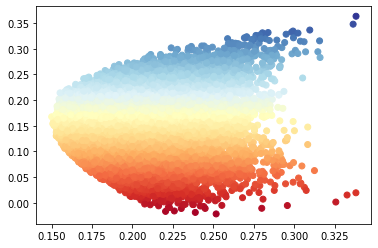

In [55]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.ret,cmap='RdYlBu')